In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


### 2. Програмно реалізувати модель експоненційного зростання населення (мова програмування та середовище розроблення програми студент обирає самостійно). Для цього самостійно підібрати параметри для проведення обчислювального експерименту. Здійснити моделювання для різних наборів даних.

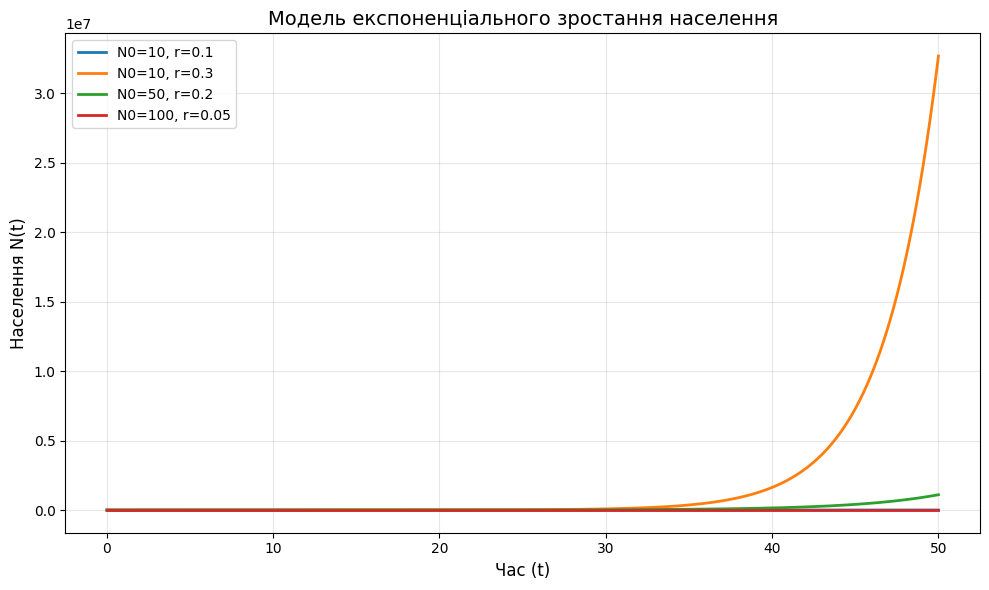

Результати при t = 50:
----------------------------------------
N0=10, r=0.1: N(50) = 1484.13
N0=10, r=0.3: N(50) = 32690173.72
N0=50, r=0.2: N(50) = 1101323.29
N0=100, r=0.05: N(50) = 1218.25


In [ ]:
params = [
    (10, 0.1, 'N0=10, r=0.1'),
    (10, 0.3, 'N0=10, r=0.3'),
    (50, 0.2, 'N0=50, r=0.2'),
    (100, 0.05, 'N0=100, r=0.05')
]

t = np.linspace(0, 50, 500)

# Функція експоненціального зростання
def exponential_growth(N0, r, t):
    return N0 * np.exp(r * t)

plt.figure(figsize=(10, 6))

for N0, r, label in params:
    N = exponential_growth(N0, r, t)
    plt.plot(t, N, linewidth=2, label=label)

plt.xlabel('Час (t)', fontsize=12)
plt.ylabel('Населення N(t)', fontsize=12)
plt.title('Модель експоненціального зростання населення', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("Результати при t = 50:")
print("-" * 40)
for N0, r, label in params:
    N_final = exponential_growth(N0, r, 50)
    print(f"{label}: N(50) = {N_final:.2f}")

### 3. Програмно реалізувати модель гонки озброєнь Річардсона. Для цього самостійно підібрати параметри для проведення обчислювального експерименту. Здійснити моделювання для різних наборів даних. Дослідити питання стійкості (за теорією, яка наведена для поданої моделі).

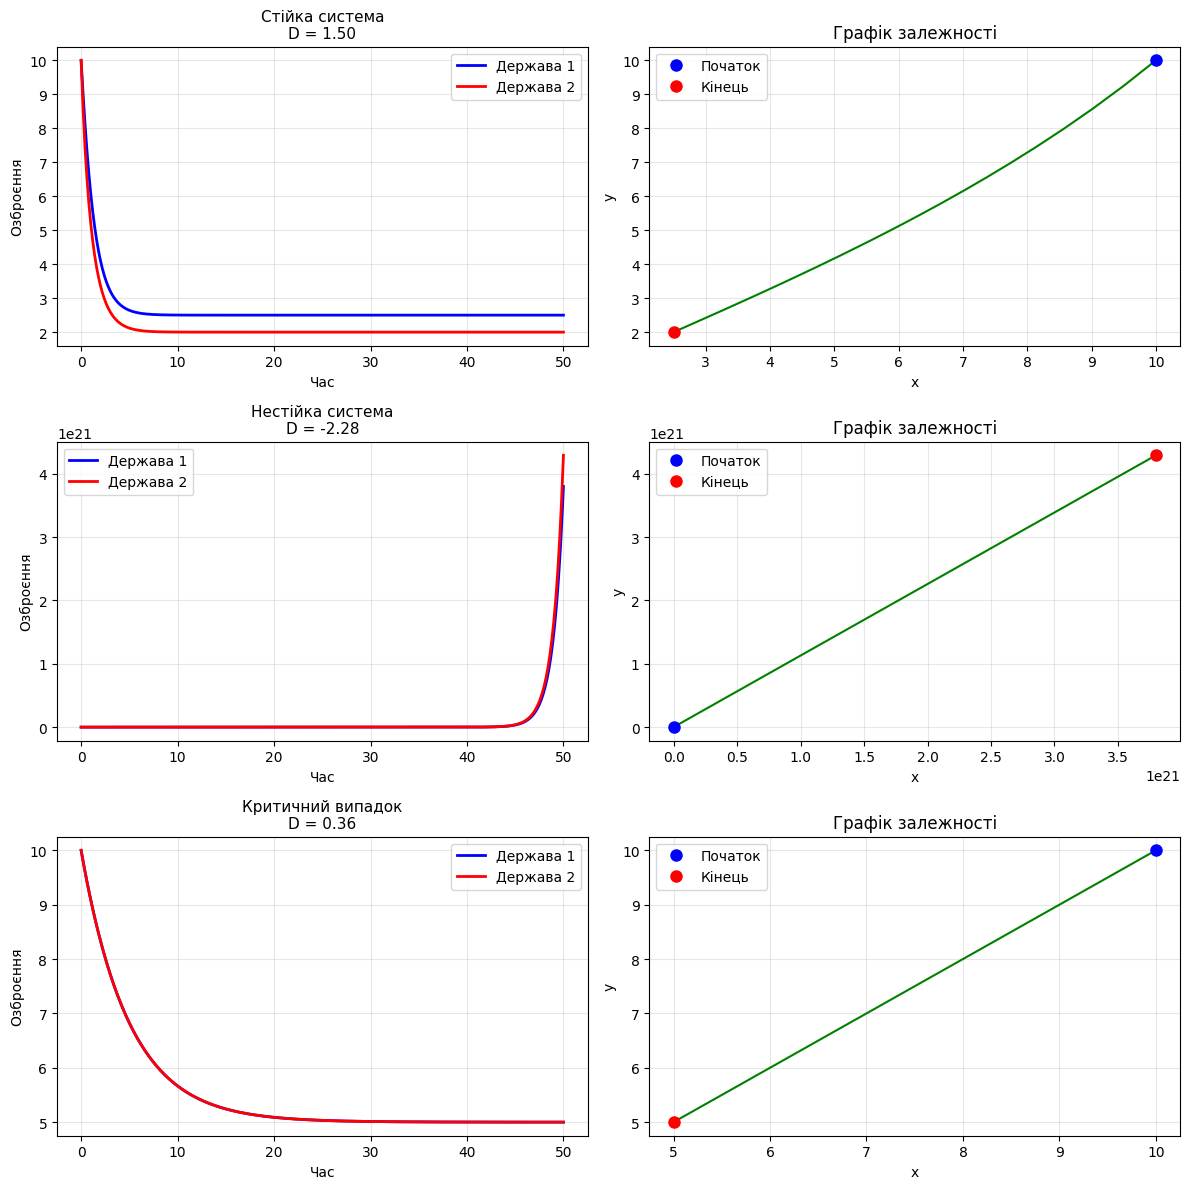

Аналіз стійкості систем
----------------------------------------
Стійка система: D = 1.50 → СТІЙКА
Нестійка система: D = -2.28 → НЕСТІЙКА
Критичний випадок: D = 0.36 → СТІЙКА


In [3]:
def richardson_model(x, y, a, b, m, n, g, h):
    dxdt = a * y - m * x + g  # Держава 1
    dydt = b * x - n * y + h  # Держава 2
    return dxdt, dydt

def simulate_richardson(params, t_max=50, dt=0.1, x0=10, y0=10):
# Симуляція моделі Річардсона
    a, b, m, n, g, h = params
    steps = int(t_max / dt)
    
    t = np.linspace(0, t_max, steps)
    x = np.zeros(steps)
    y = np.zeros(steps)
    
    x[0], y[0] = x0, y0
    
    # Метод Ейлера
    for i in range(1, steps):
        dxdt, dydt = richardson_model(x[i-1], y[i-1], a, b, m, n, g, h)
        x[i] = x[i-1] + dxdt * dt
        y[i] = y[i-1] + dydt * dt
    
    # Аналіз стійкості
    D = m * n - a * b
    is_stable = D > 0
    
    return t, x, y, D, is_stable

parameter_sets = [
    (0.5, 0.6, 1.2, 1.5, 2.0, 1.5, "Стійка система"),
    (1.5, 1.8, 0.7, 0.6, 2.0, 1.5, "Нестійка система"),
    (0.8, 0.8, 1.0, 1.0, 1.0, 1.0, "Критичний випадок")
]

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for idx, (a, b, m, n, g, h, title) in enumerate(parameter_sets):
    params = (a, b, m, n, g, h)
    t, x, y, D, stable = simulate_richardson(params)
    
    axes[idx, 0].plot(t, x, 'b-', linewidth=2, label='Держава 1')
    axes[idx, 0].plot(t, y, 'r-', linewidth=2, label='Держава 2')
    axes[idx, 0].set_title(f'{title}\nD = {D:.2f}', fontsize=11)
    axes[idx, 0].set_xlabel('Час')
    axes[idx, 0].set_ylabel('Озброєння')
    axes[idx, 0].legend()
    axes[idx, 0].grid(True, alpha=0.3)
    
    axes[idx, 1].plot(x, y, 'g-', linewidth=1.5)
    axes[idx, 1].plot(x[0], y[0], 'bo', markersize=8, label='Початок')
    axes[idx, 1].plot(x[-1], y[-1], 'ro', markersize=8, label='Кінець')
    axes[idx, 1].set_title('Графік залежності')
    axes[idx, 1].set_xlabel('x')
    axes[idx, 1].set_ylabel('y')
    axes[idx, 1].legend()
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Аналіз стійкості систем")
print("-" * 40)
for params_set in parameter_sets:
    a, b, m, n, g, h, title = params_set
    D = m * n - a * b
    stability = "СТІЙКА" if D > 0 else "НЕСТІЙКА" if D < 0 else "КРИТИЧНА"
    print(f"{title}: D = {D:.2f} → {stability}")

### 4. Проаналізувати моделі соціальниї процесів, які будуються на основі клітинних автоматів (теорія лабораторної роботи).

### 5. Програмно реалізувати моделі виборця, взаємодії та модель Шнайда. Для цього самостійно підібрати параметри для проведення обчислювального експерименту. Здійснити моделювання для різних наборів даних.

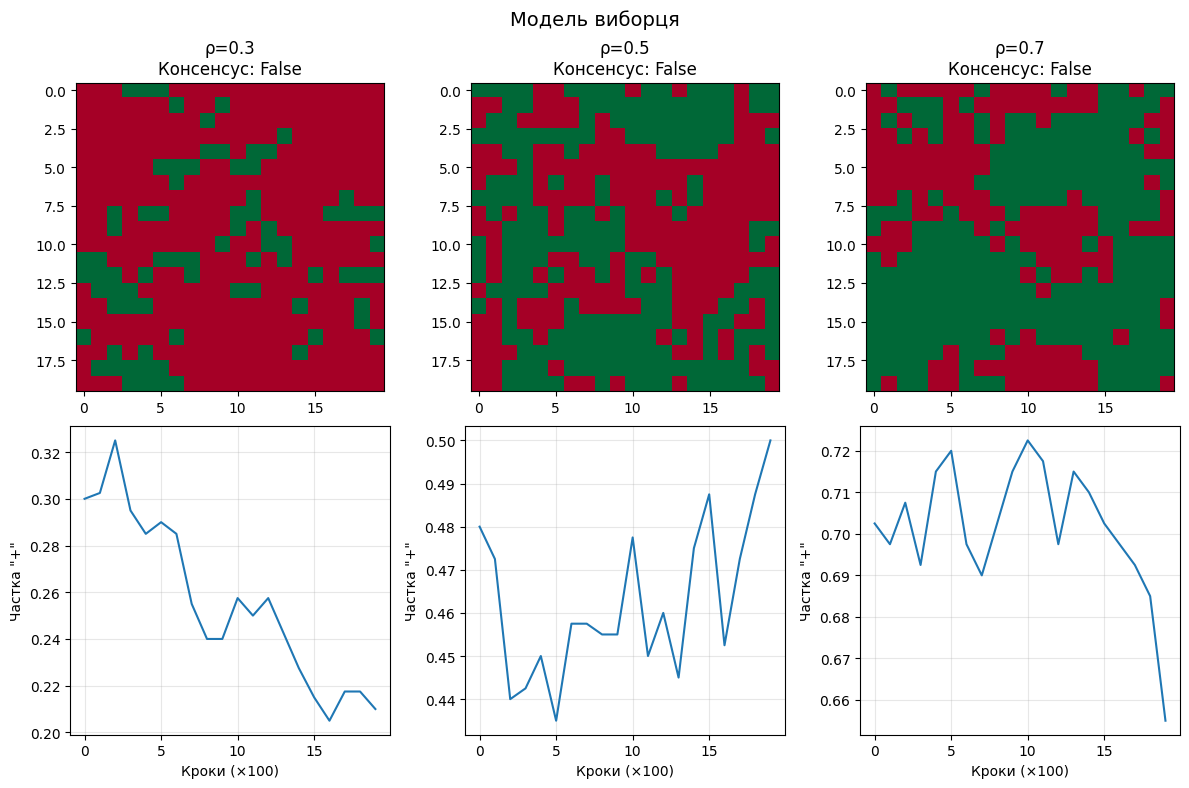

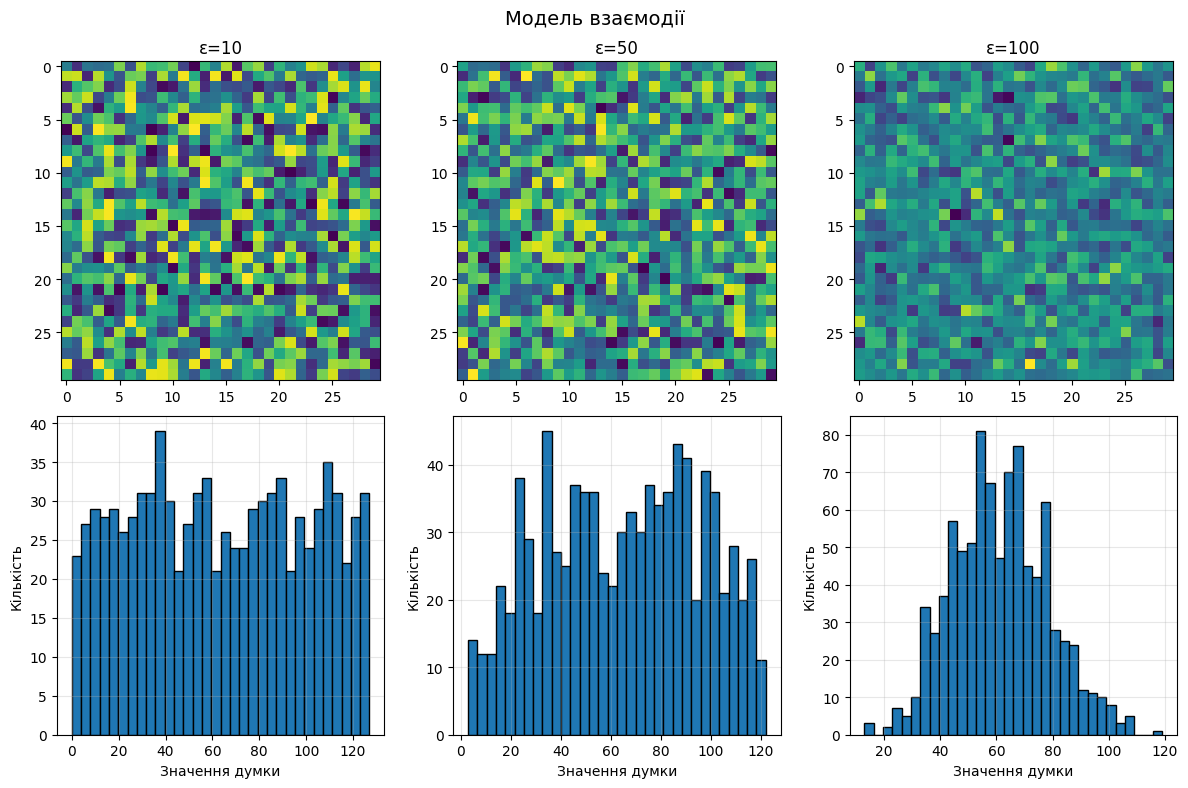

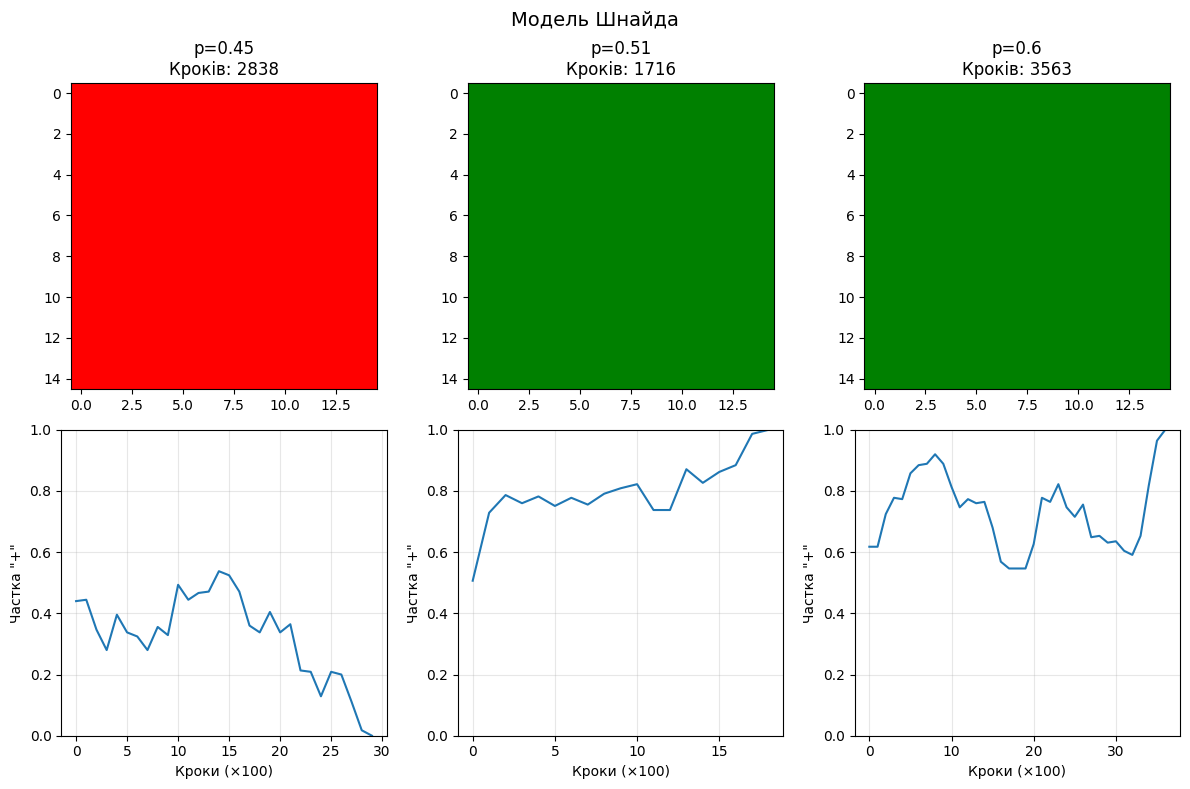

In [4]:
def voter_model(N=10, rho=0.5, steps=1000):
    grid = np.random.choice([-1, 1], size=(N, N), p=[1-rho, rho])
    history = []
    for step in range(steps):
        if step % 100 == 0:
            history.append(np.sum(grid == 1) / (N*N))
        i, j = np.random.randint(0, N), np.random.randint(0, N)
        directions = [
            (-1, 0), (-1, 1), (0, 1), (1, 1),
            (1, 0), (1, -1), (0, -1), (-1, -1)
        ]
        di, dj = directions[np.random.randint(8)]
        ni, nj = (i + di) % N, (j + dj) % N
        grid[i, j] = grid[ni, nj]
    consensus = np.all(grid == 1) or np.all(grid == -1)
    return grid, history, consensus

def interaction_model(N=50, opinions_count=128, e=50, m=0.3, steps=3000):
    grid = np.random.randint(0, opinions_count, size=(N, N))
    for step in range(steps):
        i1, j1 = np.random.randint(0, N, size=2)
        i2, j2 = np.random.randint(0, N, size=2)
        o1, o2 = grid[i1, j1], grid[i2, j2]
        if abs(o1 - o2) < e:
            adjustment = int((m/2) * (o1 - o2))
            grid[i1, j1] = max(0, min(opinions_count-1, o1 - adjustment))
            grid[i2, j2] = max(0, min(opinions_count-1, o2 + adjustment))
    return grid

def sznajd_model(N=10, p_positive=0.51, steps=10000):
    grid = np.random.choice([0, 1], size=(N, N), p=[1-p_positive, p_positive])
    step_count = 0
    history = []
    for step in range(steps):
        step_count = step + 1
        if step % 100 == 0:
            history.append(np.sum(grid == 1) / (N*N))
        i, j = np.random.randint(0, N), np.random.randint(0, N)
        directions = [(-1,0), (1,0), (0,-1), (0,1)]
        di, dj = directions[np.random.randint(4)]
        ni, nj = (i + di) % N, (j + dj) % N
        if grid[i, j] == grid[ni, nj]:
            for di2 in [-1, 0, 1]:
                for dj2 in [-1, 0, 1]:
                    if di2 == 0 and dj2 == 0:
                        continue
                    ni2, nj2 = (i + di2) % N, (j + dj2) % N
                    grid[ni2, nj2] = grid[i, j]
        if np.all(grid == 0) or np.all(grid == 1):
            history.append(np.sum(grid == 1) / (N*N))
            break
    consensus = np.all(grid == 0) or np.all(grid == 1)
    return grid, step_count, consensus, history

def segregation_model(N=20, density=0.7, threshold=0.3, steps=100):
    grid = np.zeros((N, N), dtype=int)
    cells = N * N
    num_A = int(cells * density * 0.5)
    num_B = int(cells * density * 0.5)
    positions = np.random.choice(cells, num_A + num_B, replace=False)
    for idx, pos in enumerate(positions):
        i, j = pos // N, pos % N
        grid[i, j] = 1 if idx < num_A else 2
    unsatisfied_history = []
    for step in range(steps):
        unsatisfied = 0
        unhappy_positions = []
        for i in range(N):
            for j in range(N):
                if grid[i, j] == 0:
                    continue
                same_count = 0
                total_neighbors = 0
                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        if di == 0 and dj == 0:
                            continue
                        ni, nj = (i + di) % N, (j + dj) % N
                        if grid[ni, nj] > 0:
                            total_neighbors += 1
                            if grid[ni, nj] == grid[i, j]:
                                same_count += 1
                if total_neighbors > 0 and same_count / total_neighbors < threshold:
                    unsatisfied += 1
                    unhappy_positions.append((i, j))
        unsatisfied_history.append(unsatisfied)
        empty_positions = np.argwhere(grid == 0)
        if len(empty_positions) > 0 and len(unhappy_positions) > 0:
            for i, j in unhappy_positions:
                if len(empty_positions) == 0:
                    break
                new_pos = empty_positions[np.random.randint(len(empty_positions))]
                grid[new_pos[0], new_pos[1]] = grid[i, j]
                grid[i, j] = 0
                empty_positions = np.argwhere(grid == 0)
        if unsatisfied == 0:
            break
    return grid, unsatisfied_history

def brown_model(N=20, p_democrat=0.5, steps=100):
    grid = np.random.choice([0, 1], size=(N, N), p=[p_democrat, 1-p_democrat])
    history = []
    for step in range(steps):
        history.append(np.sum(grid == 0) / (N*N))
        new_grid = grid.copy()
        for i in range(N):
            for j in range(N):
                neighbors = []
                for di, dj in [(-1,0), (1,0), (0,-1), (0,1), (0,0)]:
                    ni, nj = (i + di) % N, (j + dj) % N
                    neighbors.append(grid[ni, nj])
                if sum(neighbors) <= 2:
                    new_grid[i, j] = 0
                else:
                    new_grid[i, j] = 1
        grid = new_grid
    return grid, history

np.random.seed(42)

fig1, axes1 = plt.subplots(2, 3, figsize=(12, 8))
rhos = [0.3, 0.5, 0.7]
for idx, rho in enumerate(rhos):
    grid, hist, cons = voter_model(N=20, rho=rho, steps=2000)
    axes1[0, idx].imshow(grid, cmap='RdYlGn', vmin=-1, vmax=1)
    axes1[0, idx].set_title(f'ρ={rho}\nКонсенсус: {cons}')
    axes1[1, idx].plot(hist)
    axes1[1, idx].set_xlabel('Кроки (×100)')
    axes1[1, idx].set_ylabel('Частка "+"')
    axes1[1, idx].grid(True, alpha=0.3)
fig1.suptitle('Модель виборця', fontsize=14)
plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(2, 3, figsize=(12, 8))
epsilons = [10, 50, 100]
for idx, epsilon in enumerate(epsilons):
    grid = interaction_model(N=30, opinions_count=128, e=epsilon, m=0.3, steps=3000)
    axes2[0, idx].imshow(grid, cmap='viridis')
    axes2[0, idx].set_title(f'ε={epsilon}')
    axes2[1, idx].hist(grid.flatten(), bins=32, edgecolor='black')
    axes2[1, idx].set_xlabel('Значення думки')
    axes2[1, idx].set_ylabel('Кількість')
    axes2[1, idx].grid(True, alpha=0.3)
fig2.suptitle('Модель взаємодії', fontsize=14)
plt.tight_layout()
plt.show()

fig3, axes3 = plt.subplots(2, 3, figsize=(12, 8))
probabilities = [0.45, 0.51, 0.6]
for idx, p in enumerate(probabilities):
    grid, steps, cons, hist = sznajd_model(N=15, p_positive=p, steps=10000)
    from matplotlib.colors import ListedColormap
    cmap_custom = ListedColormap(['red', 'green'])
    axes3[0, idx].imshow(grid, cmap=cmap_custom, vmin=0, vmax=1)
    axes3[0, idx].set_title(f'p={p}\nКроків: {steps}')
    axes3[1, idx].plot(hist)
    axes3[1, idx].set_xlabel('Кроки (×100)')
    axes3[1, idx].set_ylabel('Частка "+"')
    axes3[1, idx].set_ylim(0, 1)
    axes3[1, idx].grid(True, alpha=0.3)
fig3.suptitle('Модель Шнайда', fontsize=14)
plt.tight_layout()
plt.show()

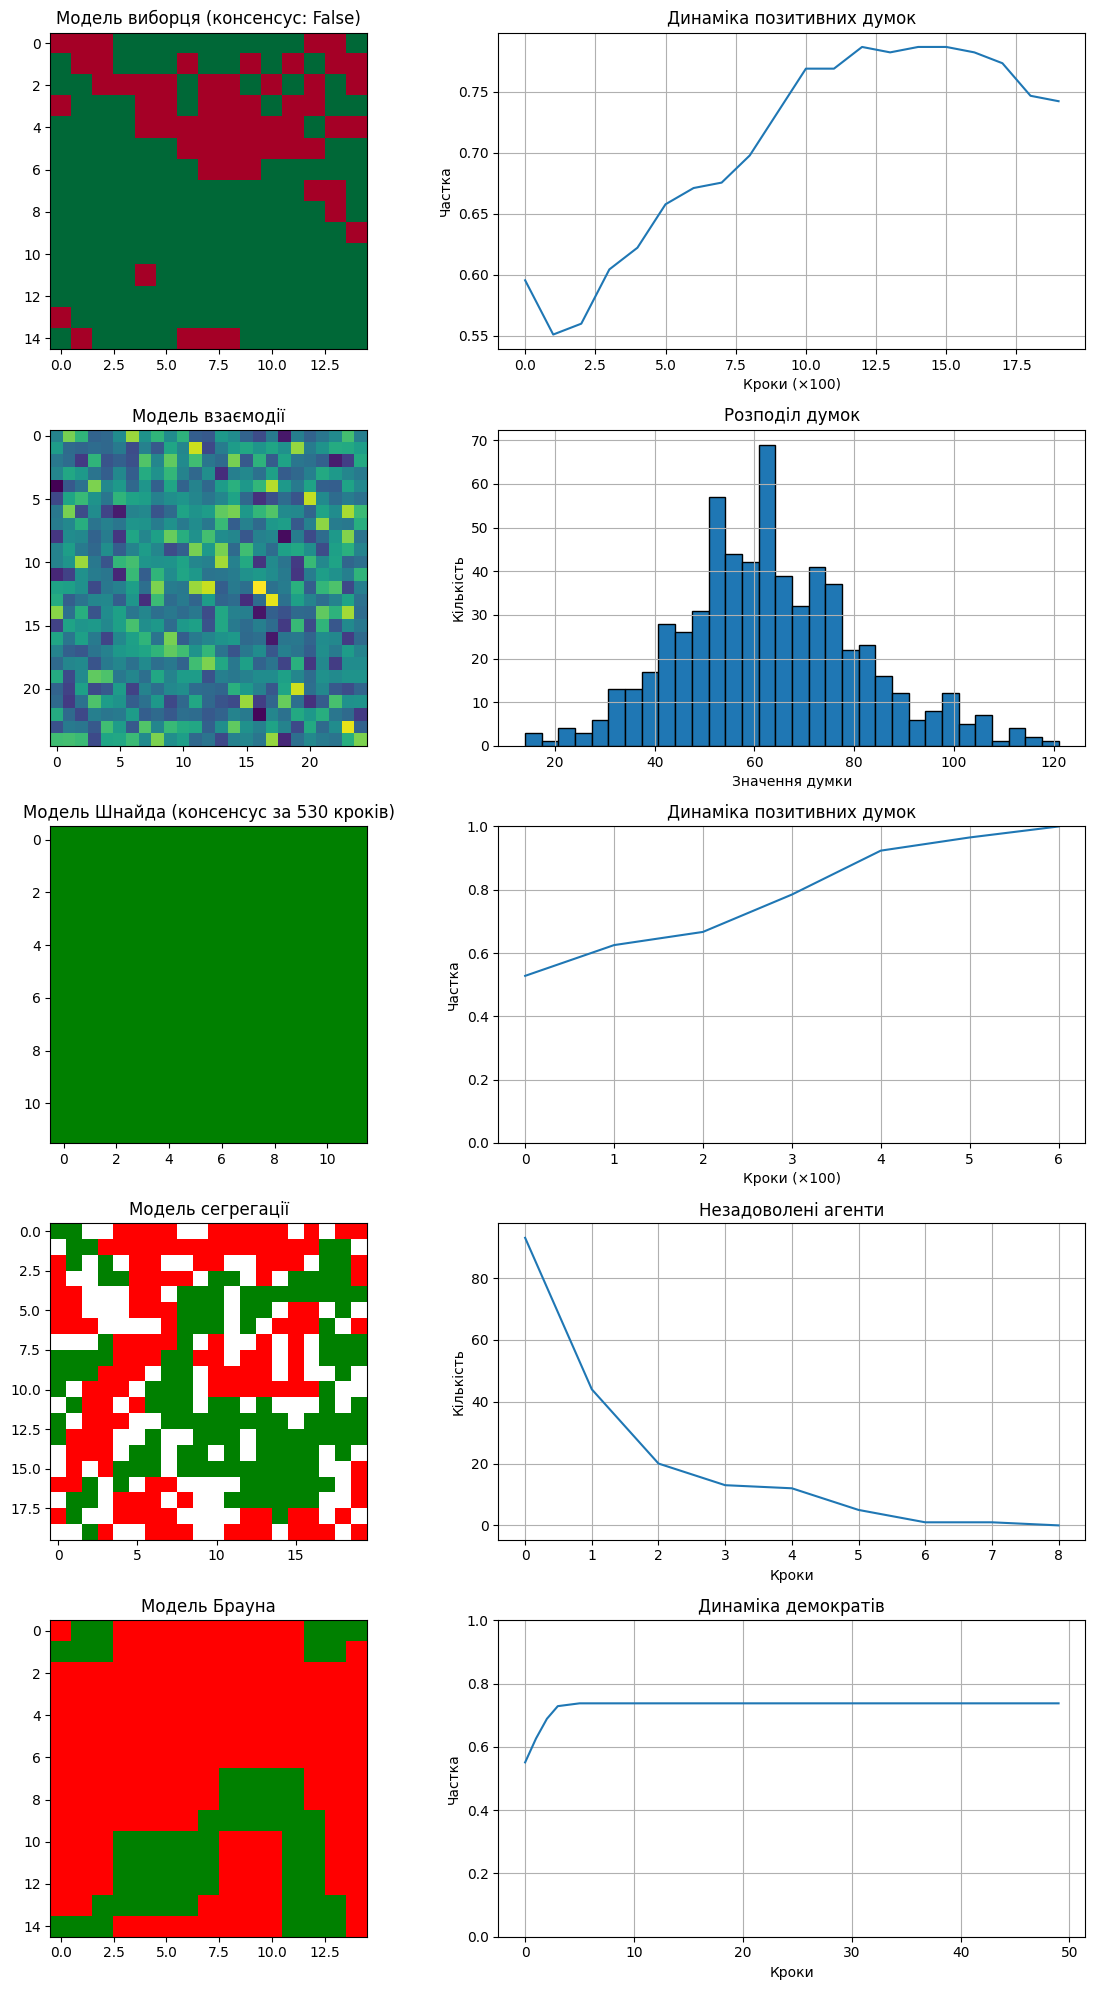

In [5]:
fig4, axes = plt.subplots(5, 2, figsize=(12, 20))

grid1, hist1, cons1 = voter_model(N=15, rho=0.55, steps=2000)
axes[0,0].imshow(grid1, cmap='RdYlGn', vmin=-1, vmax=1)
axes[0,0].set_title(f'Модель виборця (консенсус: {cons1})')
axes[0,1].plot(hist1)
axes[0,1].set_title('Динаміка позитивних думок')
axes[0,1].set_xlabel('Кроки (×100)')
axes[0,1].set_ylabel('Частка')
axes[0,1].grid(True)

grid2 = interaction_model(N=25, opinions_count=128, e=50, m=0.3, steps=5000)
axes[1,0].imshow(grid2, cmap='viridis')
axes[1,0].set_title('Модель взаємодії')
axes[1,1].hist(grid2.flatten(), bins=32, edgecolor='black')
axes[1,1].set_title('Розподіл думок')
axes[1,1].set_xlabel('Значення думки')
axes[1,1].set_ylabel('Кількість')
axes[1,1].grid(True)

grid3, steps3, cons3, hist3 = sznajd_model(N=12, p_positive=0.51, steps=10000)
cmap_sznajd = plt.cm.colors.ListedColormap(['red', 'green'])
axes[2,0].imshow(grid3, cmap=cmap_sznajd, vmin=0, vmax=1)
axes[2,0].set_title(f'Модель Шнайда (консенсус за {steps3} кроків)')
axes[2,1].plot(hist3)
axes[2,1].set_title('Динаміка позитивних думок')
axes[2,1].set_xlabel('Кроки (×100)')
axes[2,1].set_ylabel('Частка')
axes[2,1].grid(True)
axes[2,1].set_ylim(0, 1)

grid4, hist4 = segregation_model(N=20, density=0.7, threshold=0.4, steps=50)
cmap_seg = plt.cm.colors.ListedColormap(['white', 'green', 'red'])
bounds = [0, 0.5, 1.5, 2.5]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap_seg.N)
axes[3,0].imshow(grid4, cmap=cmap_seg, norm=norm)
axes[3,0].set_title('Модель сегрегації')
axes[3,1].plot(hist4)
axes[3,1].set_title('Незадоволені агенти')
axes[3,1].set_xlabel('Кроки')
axes[3,1].set_ylabel('Кількість')
axes[3,1].grid(True)

grid5, hist5 = brown_model(N=15, p_democrat=0.5, steps=50)
cmap_brown = plt.cm.colors.ListedColormap(['red', 'green'])
axes[4,0].imshow(grid5, cmap=cmap_brown, vmin=0, vmax=1)
axes[4,0].set_title('Модель Брауна')
axes[4,1].plot(hist5)
axes[4,1].set_title('Динаміка демократів')
axes[4,1].set_xlabel('Кроки')
axes[4,1].set_ylabel('Частка')
axes[4,1].set_ylim(0, 1)
axes[4,1].grid(True)

plt.tight_layout()
plt.show()

### 6. Програмно реалізувати модель сегрегації населення. Для цього самостійно підібрати параметри для проведення обчислювального експерименту. Здійснити моделювання для різних наборів даних.

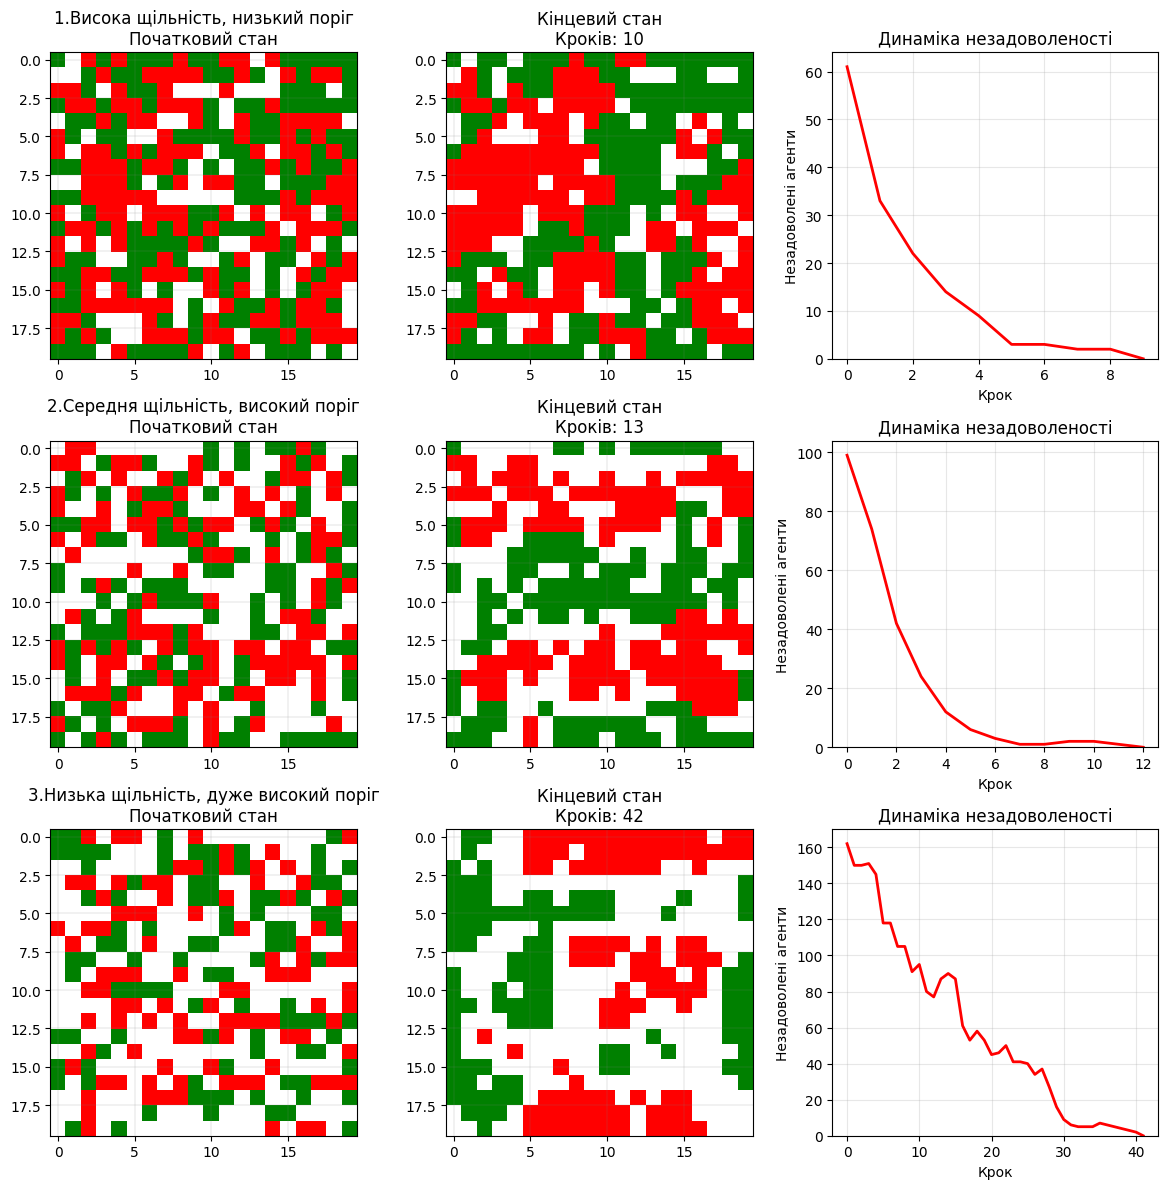

Результати моделювання сегрегації
----------------------------------------
1.Висока щільність, низький поріг
  Розмір сітки: 20×20
  Щільність: 0.8
  Поріг: 0.3
  Кроків до стабільності: 11
  Початкові незадоволені: 55
  Кінцеві незадоволені: 0
----------------------------------------
2.Середня щільність, високий поріг
  Розмір сітки: 20×20
  Щільність: 0.6
  Поріг: 0.5
  Кроків до стабільності: 9
  Початкові незадоволені: 103
  Кінцеві незадоволені: 0
----------------------------------------
3.Низька щільність, дуже високий поріг
  Розмір сітки: 20×20
  Щільність: 0.5
  Поріг: 0.7
  Кроків до стабільності: 36
  Початкові незадоволені: 153
  Кінцеві незадоволені: 0
----------------------------------------


In [6]:
def segregation_model(N=20, density=0.7, threshold=0.3, max_steps=100):
# Модель сегрегації Шеллінга
    # Створення сітки: 0-пусто, 1-тип А, 2-тип Б
    grid = np.zeros((N, N), dtype=int)
    
    # Розміщення агентів
    cells = N * N
    num_agents = int(cells * density)
    num_A = num_agents // 2
    num_B = num_agents - num_A
    
    positions = np.random.choice(cells, num_agents, replace=False)
    for idx, pos in enumerate(positions):
        i, j = divmod(pos, N)
        grid[i, j] = 1 if idx < num_A else 2
    
    initial_grid = grid.copy()
    unsatisfied_history = []
    
    for step in range(max_steps):
        unsatisfied_positions = []
        
        for i in range(N):
            for j in range(N):
                if grid[i, j] == 0:
                    continue
                
                same_type = 0
                neighbors = 0
                
                # Перевірка сусідів 
                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        if di == 0 and dj == 0:
                            continue
                        ni, nj = (i + di) % N, (j + dj) % N
                        if grid[ni, nj] > 0:
                            neighbors += 1
                            if grid[ni, nj] == grid[i, j]:
                                same_type += 1
                
                if neighbors > 0 and same_type / neighbors < threshold:
                    unsatisfied_positions.append((i, j))
        
        unsatisfied_history.append(len(unsatisfied_positions))
        
        # Переселення незадоволених
        empty_cells = np.argwhere(grid == 0)
        if len(empty_cells) > 0 and len(unsatisfied_positions) > 0:
            for i, j in unsatisfied_positions:
                if len(empty_cells) == 0:
                    break
                idx = np.random.randint(len(empty_cells))
                new_i, new_j = empty_cells[idx]
                grid[new_i, new_j] = grid[i, j]
                grid[i, j] = 0
                empty_cells = np.argwhere(grid == 0)
        
        # Умова зупинки
        if len(unsatisfied_positions) == 0:
            break
    
    return initial_grid, grid, unsatisfied_history, step + 1

# Параметри експериментів
experiments = [
    (20, 0.8, 0.3, "1.Висока щільність, низький поріг"),
    (20, 0.6, 0.5, "2.Середня щільність, високий поріг"),
    (20, 0.5, 0.7, "3.Низька щільність, дуже високий поріг")
]

np.random.seed(42)
fig, axes = plt.subplots(len(experiments), 3, figsize=(12, 4*len(experiments)))

for idx, (N, density, threshold, title) in enumerate(experiments):
    initial, final, history, steps = segregation_model(N, density, threshold)
    
    colors = ['white', 'green', 'red']
    cmap = ListedColormap(colors)
    
    # Початковий стан
    axes[idx, 0].imshow(initial, cmap=cmap, vmin=0, vmax=2)
    axes[idx, 0].set_title(f'{title}\nПочатковий стан')
    axes[idx, 0].grid(True, color='gray', linestyle='-', linewidth=0.3, alpha=0.5)
    
    # Кінцевий стан
    axes[idx, 1].imshow(final, cmap=cmap, vmin=0, vmax=2)
    axes[idx, 1].set_title(f'Кінцевий стан\nКроків: {steps}')
    axes[idx, 1].grid(True, color='gray', linestyle='-', linewidth=0.3, alpha=0.5)
    
    # Динаміка незадоволеності
    axes[idx, 2].plot(history, 'r-', linewidth=2)
    axes[idx, 2].set_title('Динаміка незадоволеності')
    axes[idx, 2].set_xlabel('Крок')
    axes[idx, 2].set_ylabel('Незадоволені агенти')
    axes[idx, 2].grid(True, alpha=0.3)
    axes[idx, 2].set_ylim(bottom=0)

plt.tight_layout()
plt.show()

print("Результати моделювання сегрегації")
print("-" * 40)
for N, density, threshold, title in experiments:
    initial, final, history, steps = segregation_model(N, density, threshold)
    print(f"{title}")
    print(f"  Розмір сітки: {N}×{N}")
    print(f"  Щільність: {density}")
    print(f"  Поріг: {threshold}")
    print(f"  Кроків до стабільності: {steps}")
    print(f"  Початкові незадоволені: {history[0] if history else 0}")
    print(f"  Кінцеві незадоволені: {history[-1] if history else 0}")
    print("-" * 40)